In [3]:
import yfinance as yf

# Fetch Tesla historical data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Save to CSV
tesla_data.to_csv('tesla_data.csv', index=False)

# Display the first five rows
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Use the valid URL
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}  # Avoid being blocked
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Find the correct table (Tesla Quarterly Revenue)
tables = soup.find_all("table")
tesla_revenue = pd.read_html(str(tables[0]))[0]  # First table contains quarterly revenue

# Rename columns and clean data
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "", regex=False)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "", regex=False).astype(float)

# Display last five rows
print(tesla_revenue.tail())

    Date  Revenue
10  2013   2013.0
11  2012    413.0
12  2011    204.0
13  2010    117.0
14  2009    112.0


C:\Users\achak\AppData\Local\Temp\ipykernel_6224\1681492794.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tables[0]))[0]  # First table contains quarterly revenue


In [7]:
import yfinance as yf

# Fetch GameStop historical data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset index, save to CSV, and display first five rows
gme_data.reset_index(inplace=True)
gme_data.to_csv('gme_data.csv', index=False)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Extract the revenue table
tables = soup.find_all("table")
gme_revenue = pd.read_html(str(tables[1]))[0]  # Second table contains annual revenue
gme_revenue.columns = ["Date", "Revenue"]

# Clean data and display last five rows
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$", "", regex=False).str.replace(",", "", regex=False).astype(float)
print(gme_revenue.tail())

          Date  Revenue
59  2010-01-31   3524.0
60  2009-10-31   1835.0
61  2009-07-31   1739.0
62  2009-04-30   1981.0
63  2009-01-31   3492.0


C:\Users\achak\AppData\Local\Temp\ipykernel_6224\2361714549.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(tables[1]))[0]  # Second table contains annual revenue


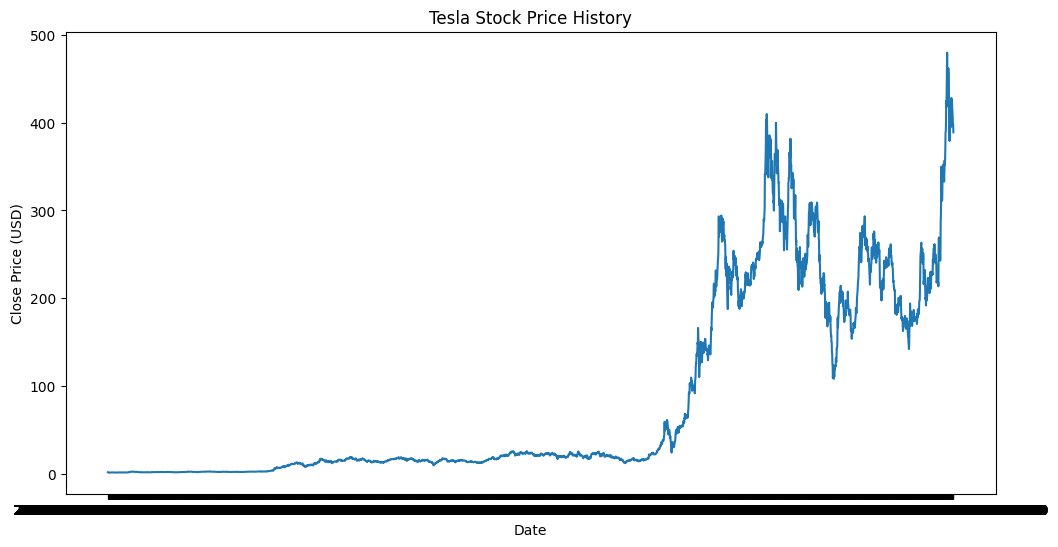

In [9]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(12,6))
    plt.plot(data["Date"], data["Close"])
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Close Price (USD)")
    plt.show()

# Load Tesla data (from Question 1)
tesla_data = pd.read_csv('tesla_data.csv')
make_graph(tesla_data, "Tesla Stock Price History")

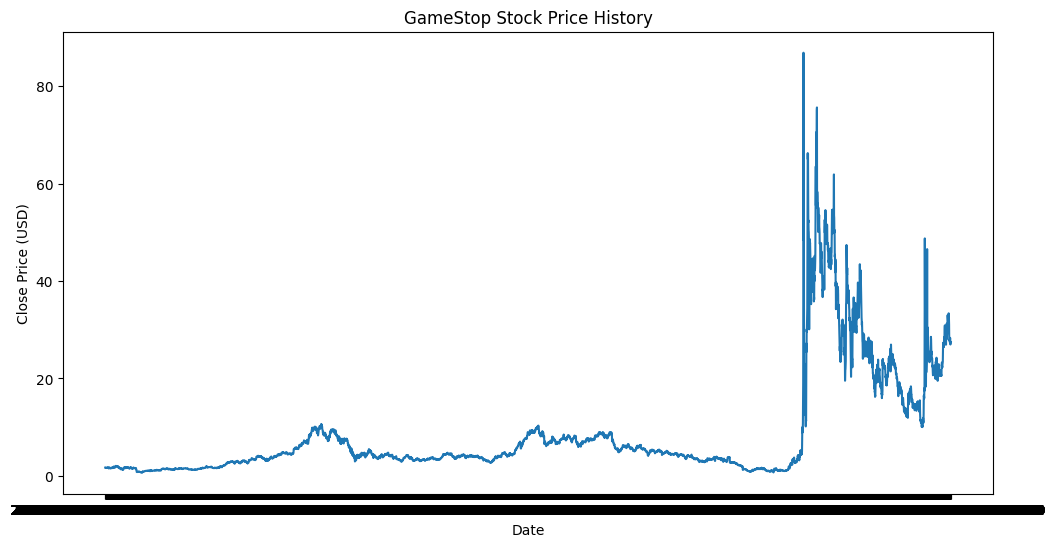

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the graphing function (if not already defined earlier)
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data["Date"], data["Close"])
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Close Price (USD)")
    plt.show()

# Load GME data from CSV (saved in Question 3)
gme_data = pd.read_csv('gme_data.csv')

# Generate the graph
make_graph(gme_data, "GameStop Stock Price History")